# Modelling

In [4]:
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Baseline Model - Linear Regression

The baseline model will be a linear regression model that considers a selection of engineered features. These will consist of the rolling variance and mean, and lag taken at various time intervals. This model will predict the next interval along for each of the hourly, daily, and weekly granularities.

|Granularity|Window Sizes|
|-----------|------------|
|Hourly     |6h, 12h, 24h|
|Daily      |7d, 14d, 30d|
|Weekly     |2w, 4w, 8w  |


In [2]:
# Load DataFrames
LCL_hrs = pd.read_pickle('data/LCL_unstack_hrs.pkl')
LCL_day = pd.read_pickle('data/LCL_unstack_day.pkl')
LCL_wks = pd.read_pickle('data/LCL_unstack_wks.pkl')

In [6]:
# Find 7, 14, 30 day rolling variance and mean for each tariff
DF_names = []
DF_list = []
DF_dict = {
   'DF':[LCL_hrs, LCL_day, LCL_wks],
   'period':['_hrs','_day','_wks'],
   'letter':['h_', 'd_', 'w_'],
   'n_ints':[[6, 12, 24], [7, 14, 30], [2, 4, 8]],
}
for i in range(len(DF_dict['DF'])):
    DF = DF_dict['DF'][i]
    p_suf = DF_dict['period'][i]
    l_suf = DF_dict['letter'][i]
    n_ints = DF_dict['n_ints'][i]

    for col in DF.columns:
        df = (pd.DataFrame(DF[col])).rename(columns = {col:'KW'})

        for j in n_ints:
            df[str(j)+l_suf+'var'] = df['KW'].rolling(j).var()
            df[str(j)+l_suf+'avg'] = df['KW'].rolling(j).mean()
            df[str(j)+l_suf+'lag'] = df['KW'].shift(periods = j)

        globals()[col + p_suf + '_df'] = df.copy()
        DF_list.append(globals()[col + p_suf + '_df'])
        DF_names.append(col + p_suf + '_df')

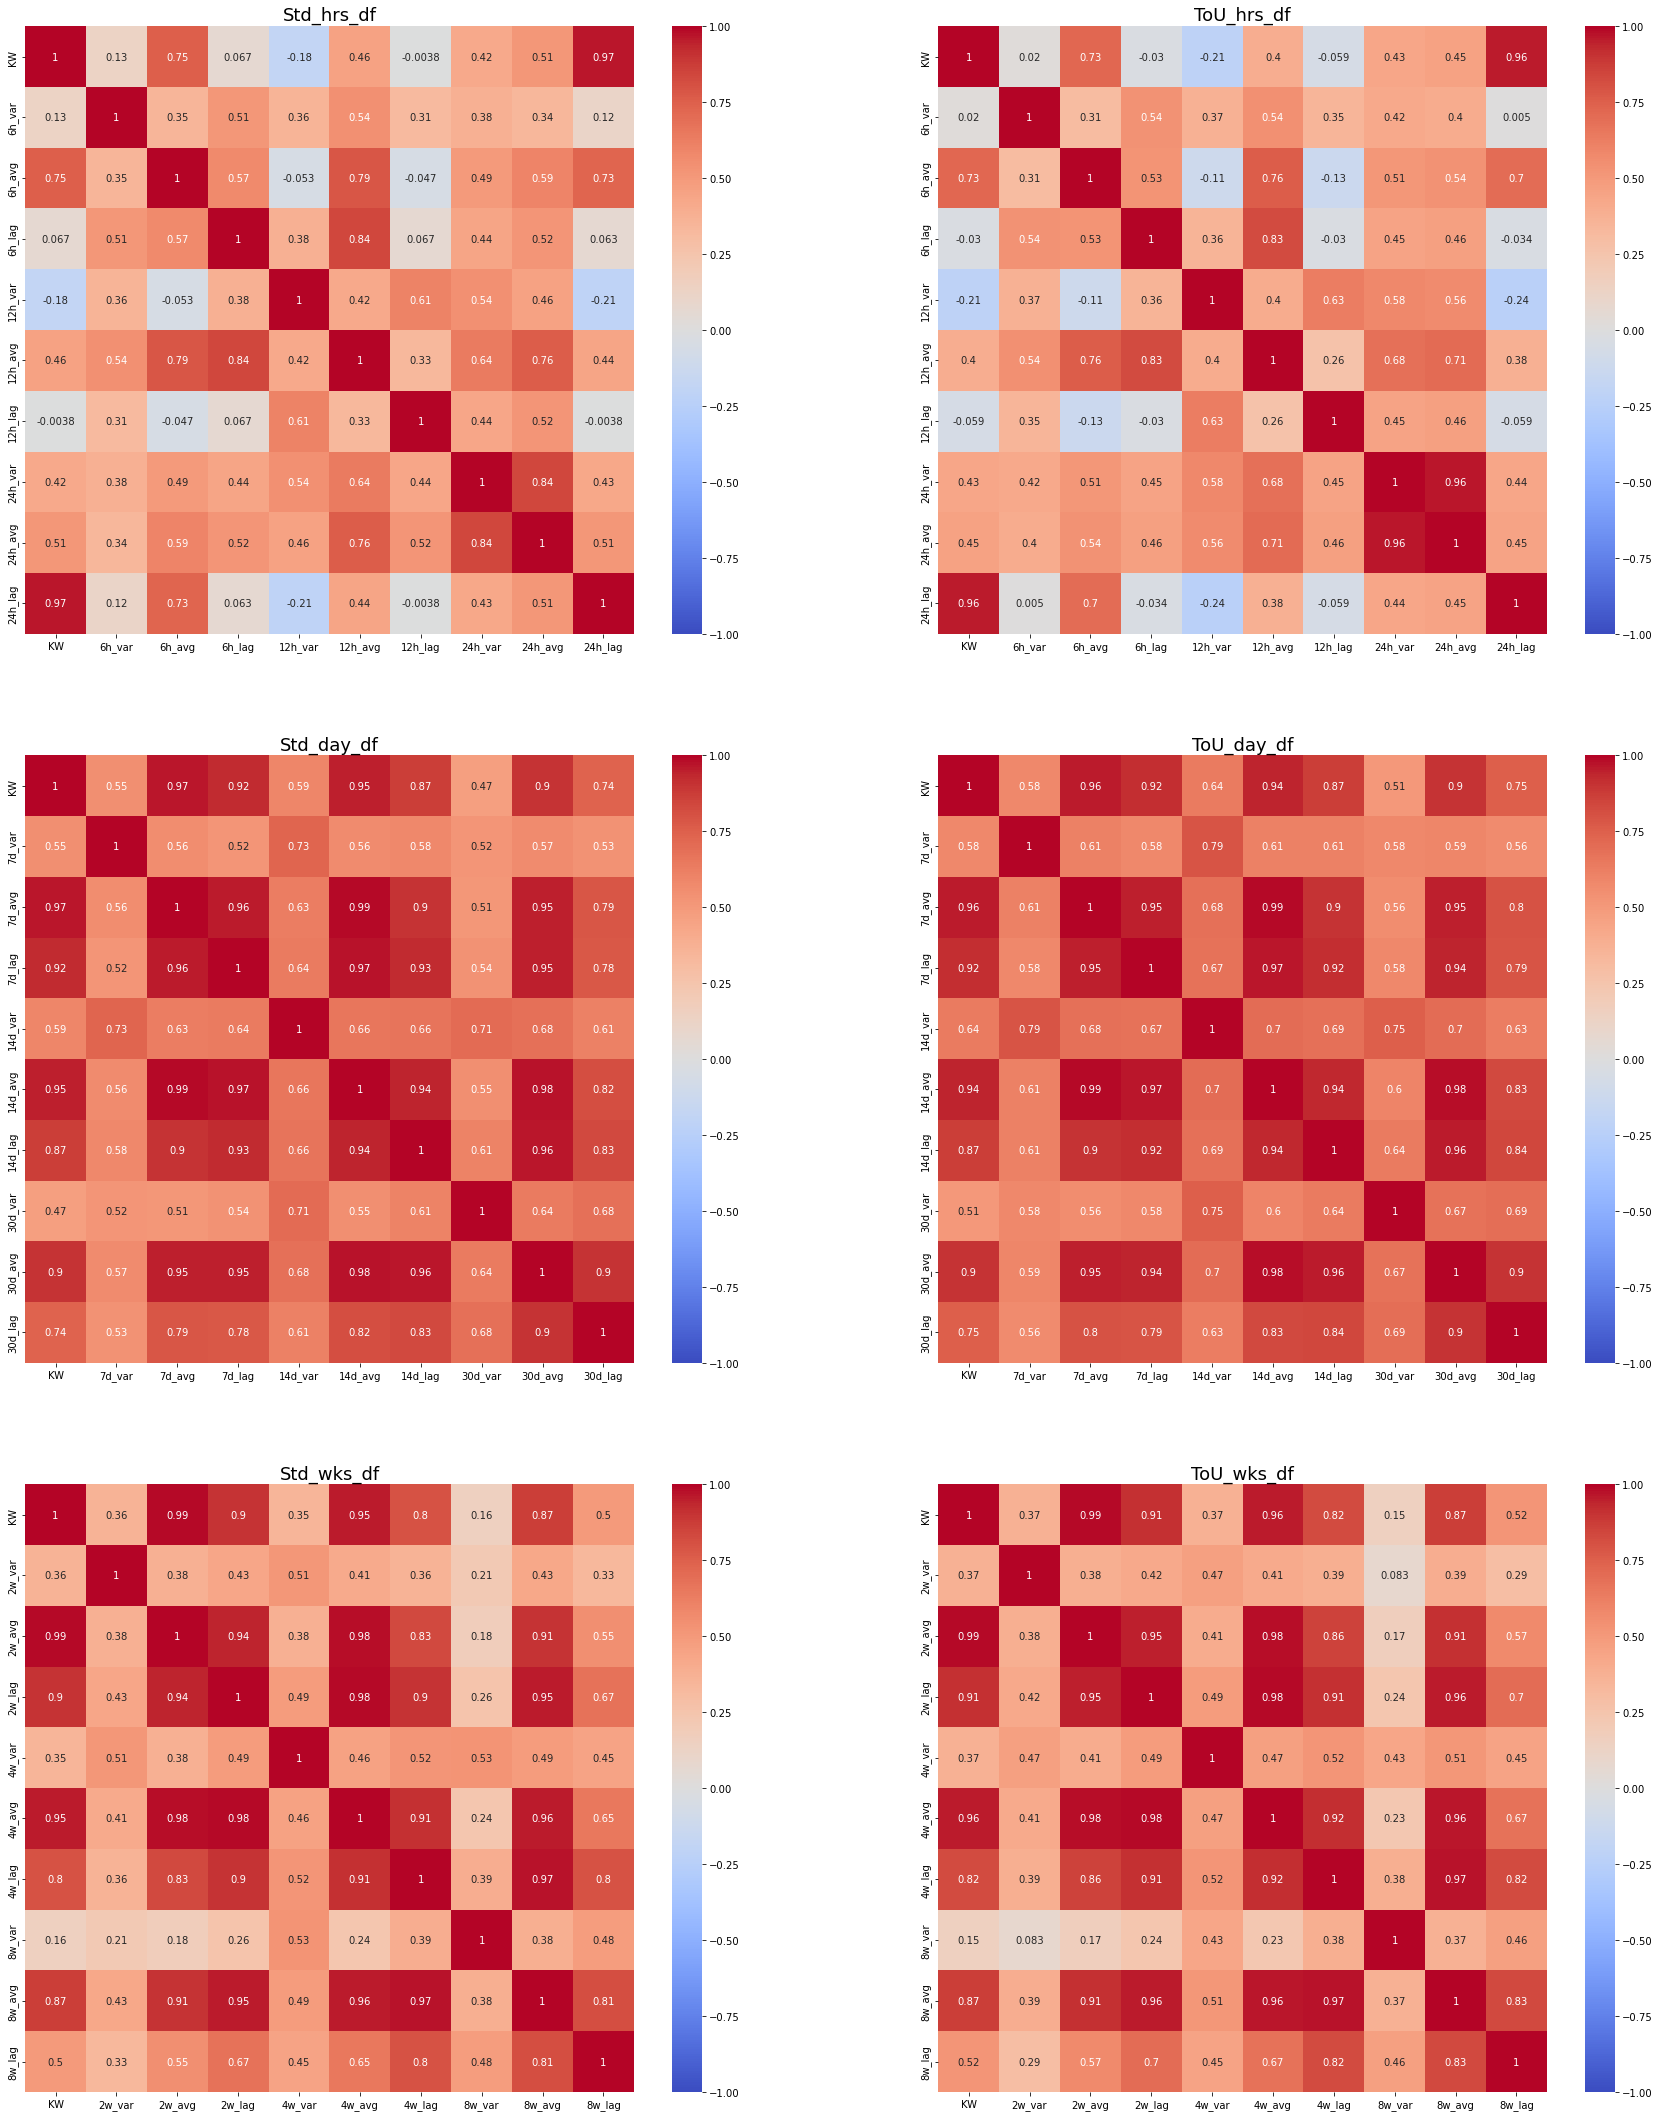

In [7]:
plt.subplots(3,2, figsize = (30,38))
count = 1

for i in range(len(DF_list)):
    df = DF_list[i]
    name = DF_names[i]
    plt.subplot(3,2,count)
    sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')
    plt.title(name, fontsize = 18)
    count +=1


plt.show()